In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
city_list = ["Las Vegas", "Charlotte", "Toronto"]
cuisines = ["japanese", "thai", "american"]

In [3]:
cuisine_city_df = pd.read_csv("FinalData/cuisines_by_city.csv")
weather_city_df = pd.read_csv("WeatherData/WeatherData.csv")

# Measure of Central Tendency Statistical Analysis

In [4]:
cuisine_city_df.head()

,City,Business ID,Total Check-Ins,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Name,State,Category,Rating,Review Count
0,Las Vegas,hihud--QRriCYZw1zZvW4g,8917,886,742,840,850,866,843,951,848,623,574,608,286,Gangnam Asian BBQ Dining,NV,japanese korean bbq,4.5,3761.0
1,Las Vegas,FNe5PPA9pyj8FjcDefCBpg,3947,273,239,308,314,495,422,413,404,359,297,269,154,Weera Thai Restaurant - Sahara,NV,thai bars,4.5,1364.0
2,Las Vegas,QXV3L_QFGj8r6nWX2kS2hA,9893,728,755,890,836,1113,905,979,990,838,691,861,307,Nacho Daddy,NV,newamerican mexican breakfast_brunch,4.5,4649.0
3,Charlotte,6hZgMg9rnDCC0RBVRlkZwQ,226,18,13,17,12,10,20,20,24,24,35,26,7,Mr Tokyo Japanese Restaurant,NC,japanese sushi salad,4.0,505.0
4,Charlotte,HhcBx0LSDkxRBKMkvkwSoA,225,17,26,27,21,35,23,21,19,12,4,16,4,Deejai Noodle Bar,NC,thai noodles cocktailbars,4.0,243.0


In [5]:
for city in city_list:
    data_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
    checkin_per_city = data_per_city.iloc[:, 3:15]
    mean_checkin_per_city = round(checkin_per_city.mean().mean(),2)
    print(f"The average number of check-ins for {city.capitalize()} Restauarants is {mean_checkin_per_city}")

The average number of check-ins for Las vegas Restauarants is 632.14
The average number of check-ins for Charlotte Restauarants is 30.58
The average number of check-ins for Toronto Restauarants is 118.33


# Scatter chart of average Temp. of each city versus restaurant check-in

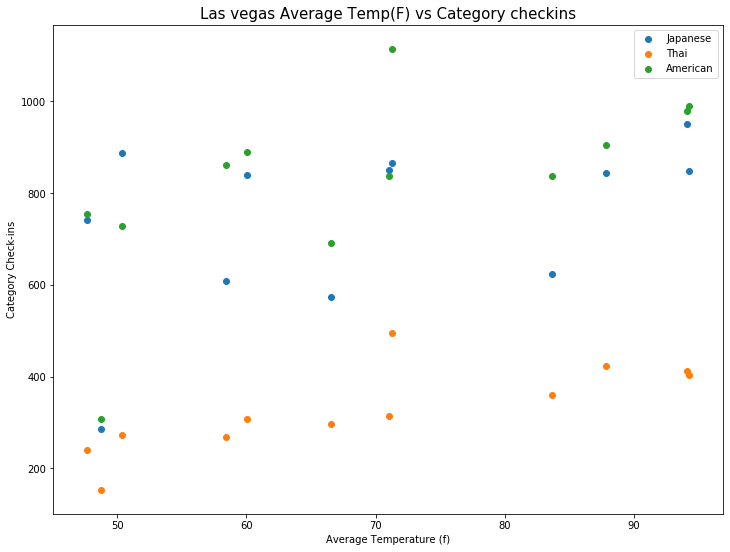

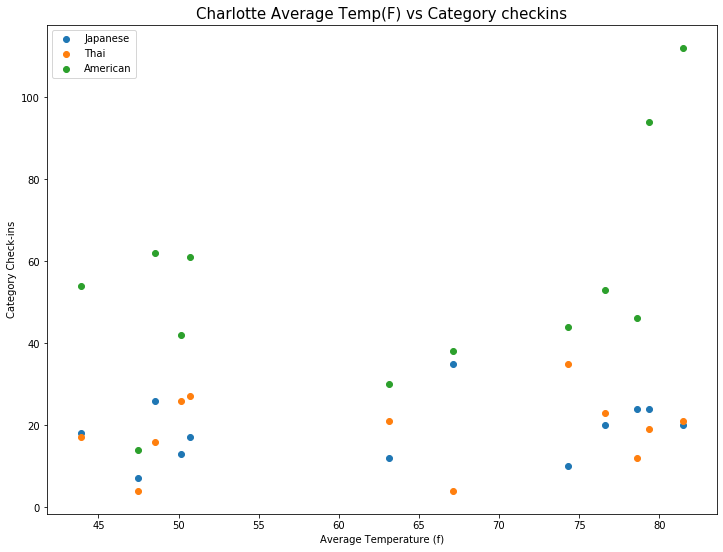

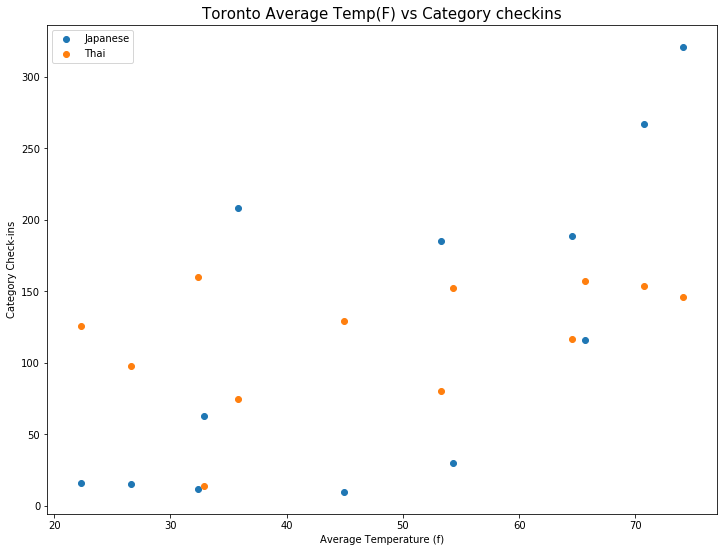

In [6]:
for city in city_list:
    city_cuisine_checkin_list = []
    for cuisine in cuisines:
        city_checkin_list = []
        checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
        for index, row in checkin_per_city.iterrows():
            if cuisine in row["Category"]:
                city_checkin_list.append(cuisine)
                city_checkin_list.append(row["2019-01"])
                city_checkin_list.append(row["2019-02"])
                city_checkin_list.append(row["2019-03"])
                city_checkin_list.append(row["2019-04"])
                city_checkin_list.append(row["2019-05"])
                city_checkin_list.append(row["2019-06"])
                city_checkin_list.append(row["2019-07"])
                city_checkin_list.append(row["2019-08"])
                city_checkin_list.append(row["2019-09"])
                city_checkin_list.append(row["2019-10"])
                city_checkin_list.append(row["2019-11"])
                city_checkin_list.append(row["2019-12"])
        if len(city_checkin_list)>0:
            city_cuisine_checkin_list.append(city_checkin_list)
    city_temperature_list = weather_city_df.loc[weather_city_df.City == city, "Average Temperature (F)"]
    
    fig, ax = plt.subplots(figsize=(12,9)) 
    for i in range((len(city_cuisine_checkin_list))):
        y = city_cuisine_checkin_list[i]
        x = city_temperature_list
        ax.scatter(x,y[1:], label=y[0].capitalize())
    plt.xlabel("Average Temperature (f)")
    plt.ylabel("Category Check-ins")
    plt.title(f"{city.capitalize()} Average Temp(F) vs Category checkins", size=15)
    plt.legend()
    plt.savefig(f"./FinalResult/scatter_chart_{city}_category.png")
    plt.show()

# Scatter chart and linear regression of check-in counts in top [japanese, thai and american] restaurant versus temperature in each city

R-square is 0.2
p-value is 0.14


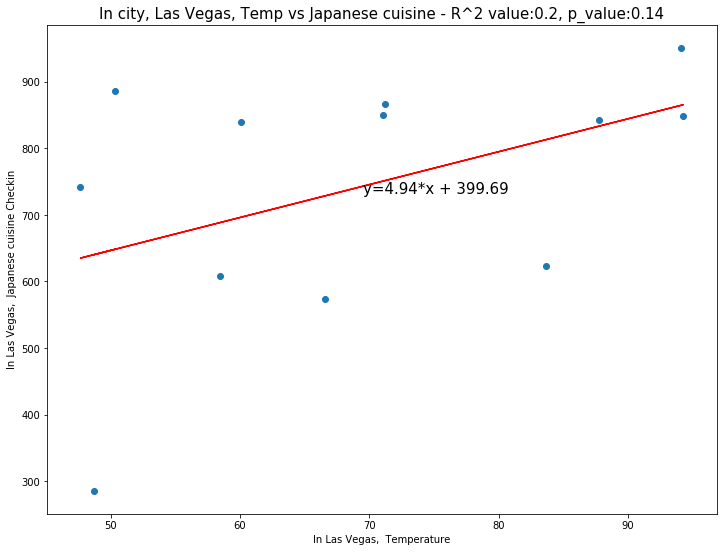

R-square is 0.62
p-value is 0.0


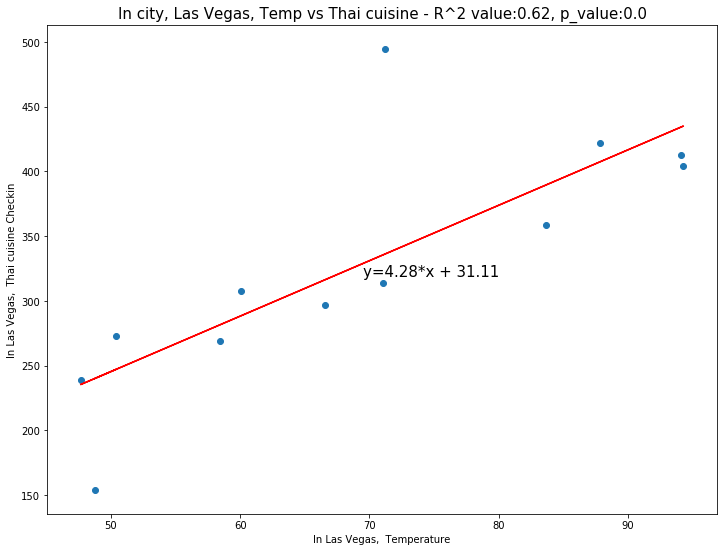

R-square is 0.38
p-value is 0.03


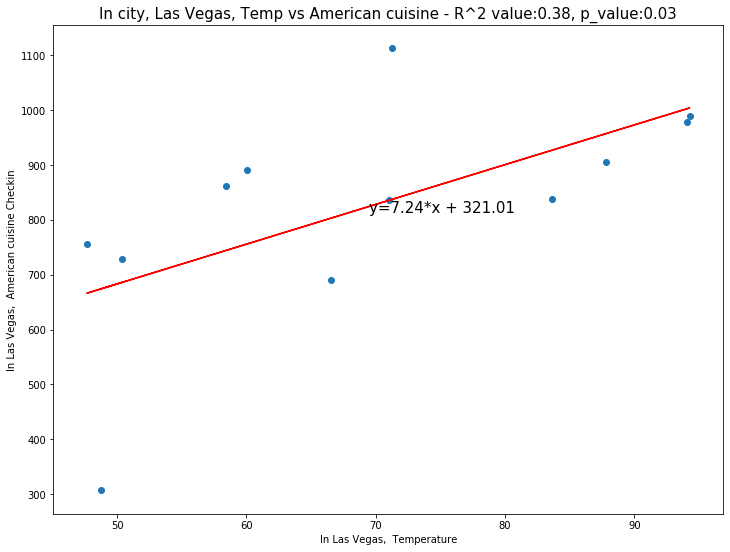

R-square is 0.08
p-value is 0.36


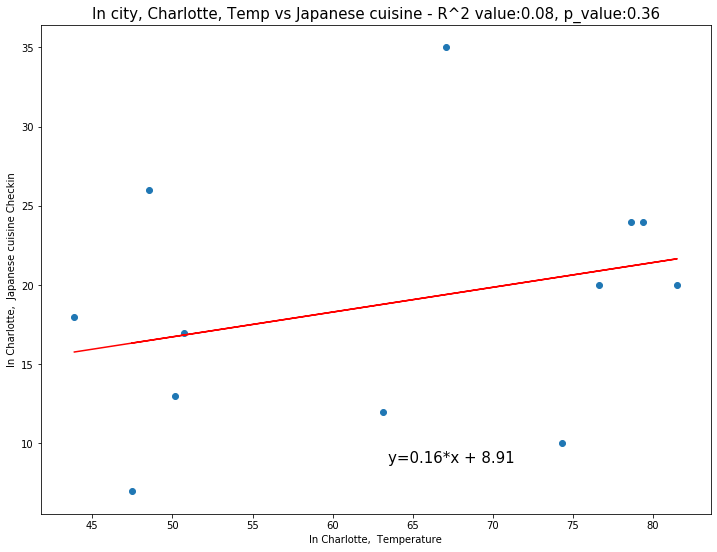

R-square is 0.03
p-value is 0.62


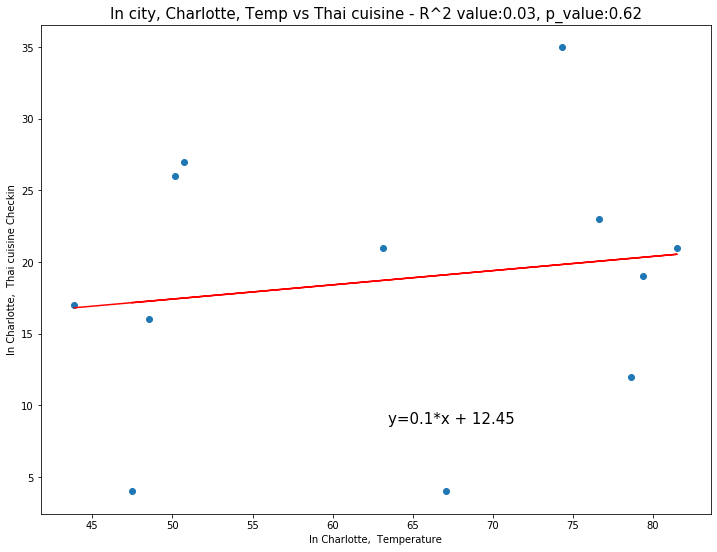

R-square is 0.22
p-value is 0.13


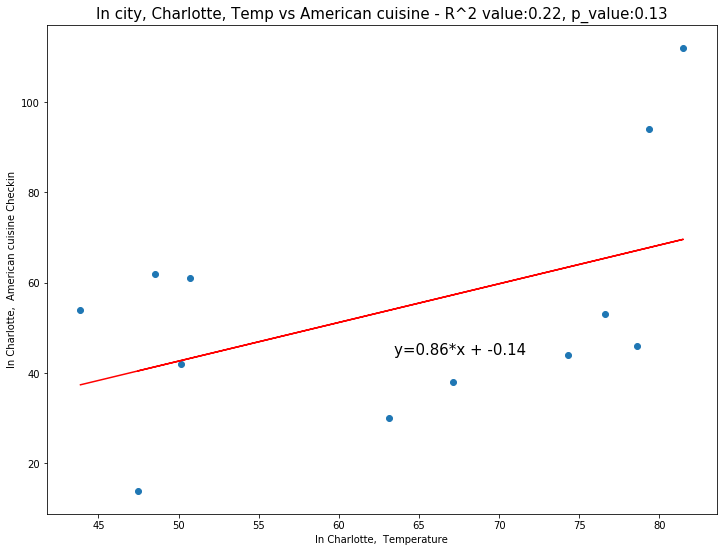

R-square is 0.53
p-value is 0.01


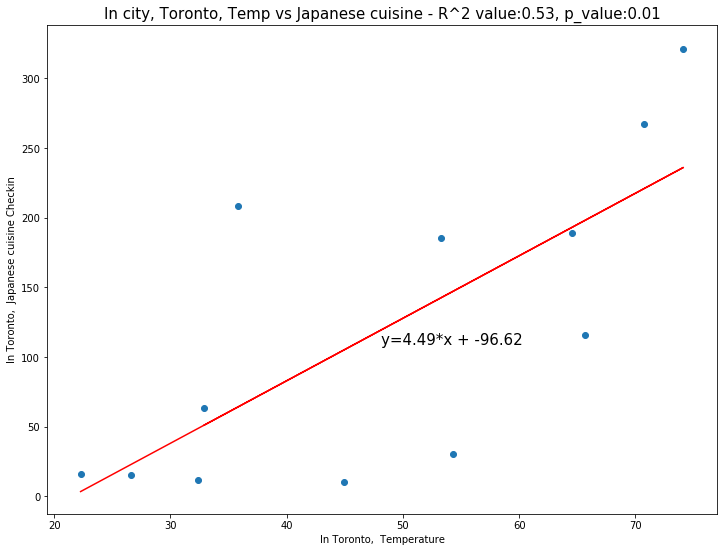

R-square is 0.2
p-value is 0.15


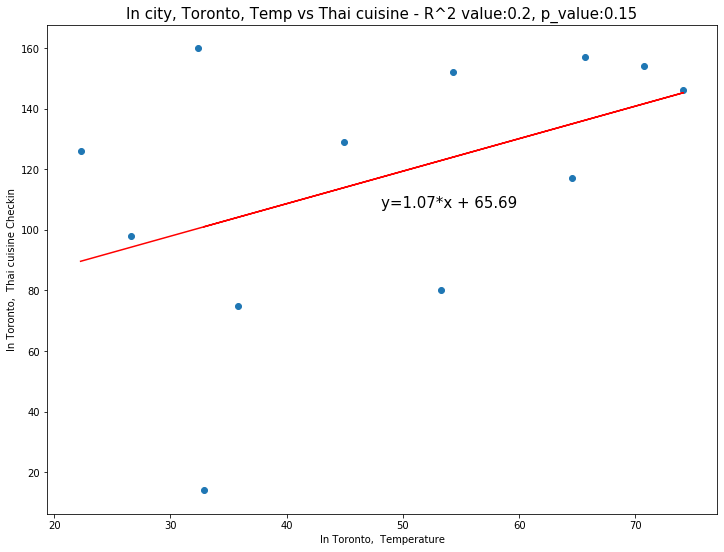

In city Toronto, there is no restaurant checkin data for american


In [7]:
for city in city_list:
    for cuisine in cuisines:
        city_checkin_list = []
        checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
        for index, row in checkin_per_city.iterrows():
            if cuisine in row["Category"]:
                city_checkin_list.append(row["2019-01"])
                city_checkin_list.append(row["2019-02"])
                city_checkin_list.append(row["2019-03"])
                city_checkin_list.append(row["2019-04"])
                city_checkin_list.append(row["2019-05"])
                city_checkin_list.append(row["2019-06"])
                city_checkin_list.append(row["2019-07"])
                city_checkin_list.append(row["2019-08"])
                city_checkin_list.append(row["2019-09"])
                city_checkin_list.append(row["2019-10"])
                city_checkin_list.append(row["2019-11"])
                city_checkin_list.append(row["2019-12"])
        city_temperature_list = weather_city_df.loc[weather_city_df.City == city, "Average Temperature (F)"]
        try:
            slope, intercept, r_value, p_value, std_err = st.linregress(city_temperature_list, city_checkin_list)
            y_value = slope*city_temperature_list + intercept
            lin_equ = f"y={round(slope,2)}*x + {round(intercept,2)}"
            
            plt.figure(figsize=(12, 9))
            plt.plot(city_temperature_list, y_value, "r-") 
            plt.annotate(lin_equ, (city_temperature_list.mean(), np.asarray(city_checkin_list).mean()-10), size=15)
            print(f"R-square is {round(r_value**2,2)}")
            print(f"p-value is {round(p_value, 2)}")
            
            plt.scatter(city_temperature_list, city_checkin_list)
            plt.ylabel(f"In {city},  {cuisine.capitalize()} cuisine Checkin")
            plt.xlabel(f"In {city},  Temperature")
            plt.title(f"In city, {city}, Temp vs {cuisine.capitalize()} cuisine - R^2 value:{round(r_value**2,2)}, p_value:{round(p_value,2)}", size=15)
            plt.savefig(f"./FinalResult/scatter_chart_{city}_weather_{cuisine}.png")
            plt.show()
        except:
            print(f"In city {city}, there is no restaurant checkin data for {cuisine}") 

# Statistical test about correlation between check-in counts of top [japanese, thai and american] restaurants in each city using chi-square test

In [8]:
degree_freedom = 11
p_value = 0.5

for city in city_list:
    city_cuisine_checkin_list = []
    for cuisine in cuisines:
        city_checkin_list = []
        checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
        for index, row in checkin_per_city.iterrows():
            if cuisine in row["Category"]:
                city_checkin_list.append(cuisine)
                city_checkin_list.append(row["2019-01"])
                city_checkin_list.append(row["2019-02"])
                city_checkin_list.append(row["2019-03"])
                city_checkin_list.append(row["2019-04"])
                city_checkin_list.append(row["2019-05"])
                city_checkin_list.append(row["2019-06"])
                city_checkin_list.append(row["2019-07"])
                city_checkin_list.append(row["2019-08"])
                city_checkin_list.append(row["2019-09"])
                city_checkin_list.append(row["2019-10"])
                city_checkin_list.append(row["2019-11"])
                city_checkin_list.append(row["2019-12"])
        if len(city_checkin_list)>0:
            city_cuisine_checkin_list.append(city_checkin_list)
    for i in range((len(city_cuisine_checkin_list))):
        for j in range(i):
            if i != j:
                x = city_cuisine_checkin_list[i]
                y = city_cuisine_checkin_list[j]
                try:
                    critical_value = st.chi2.ppf(q = 1-p_value, df = degree_freedom)
                    chi_stat = st.chisquare(np.asarray(x[1:]), np.asarray(y[1:]))
                    print(chi_stat)
                    print(f"In {city}, for cuisines of {x[0]} and {y[0]}, chi^^2 value: {round(chi_stat[0],2)} and critical value: {round(critical_value,2)}")
                    if chi_stat[0] > critical_value:
                        print(f"Therefore, in {city}, check-in number of cuisines of {x[0]} and {y[0]} are statistically different")
                    else:
                        print(f"Therefore, in {city}, check-in number of cuisines of {x[0]} and {y[0]} are not statistically different")
                except:
                    print(f"The chi square test cannot be made for {city}, for cuisines of {x[0]} and {y[0]}")
                print("------------------------")

Power_divergenceResult(statistic=2841.531614211971, pvalue=0.0)
In Las Vegas, for cuisines of thai and japanese, chi^^2 value: 2841.53 and critical value: 10.34
Therefore, in Las Vegas, check-in number of cuisines of thai and japanese are statistically different
------------------------
Power_divergenceResult(statistic=336.08819020203276, pvalue=2.1214895443834384e-65)
In Las Vegas, for cuisines of american and japanese, chi^^2 value: 336.09 and critical value: 10.34
Therefore, in Las Vegas, check-in number of cuisines of american and japanese are statistically different
------------------------
Power_divergenceResult(statistic=9406.601716407298, pvalue=0.0)
In Las Vegas, for cuisines of american and thai, chi^^2 value: 9406.6 and critical value: 10.34
Therefore, in Las Vegas, check-in number of cuisines of american and thai are statistically different
------------------------
Power_divergenceResult(statistic=128.31858615240967, pvalue=3.809217861454337e-22)
In Charlotte, for cuisines 

# Scatter chart and linear regression of check-in counts between top  [japanese, thai and american] restaurants in each city

R-square is 0.47
p-value is 0.01


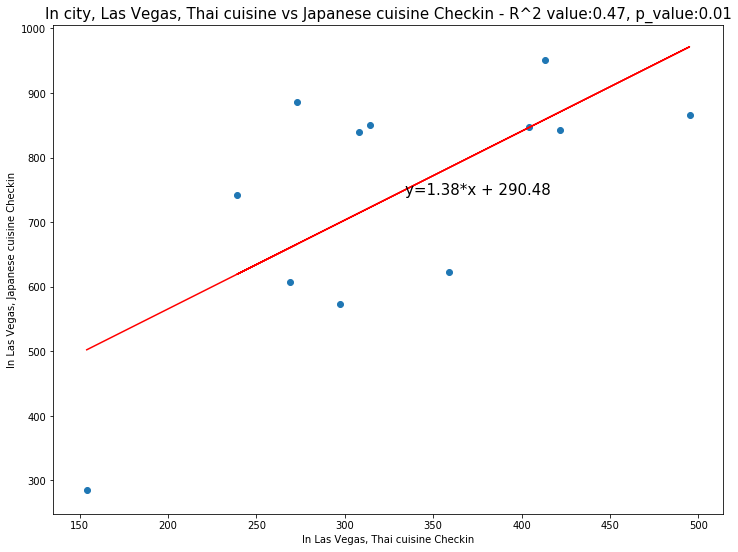

R-square is 0.66
p-value is 0.0


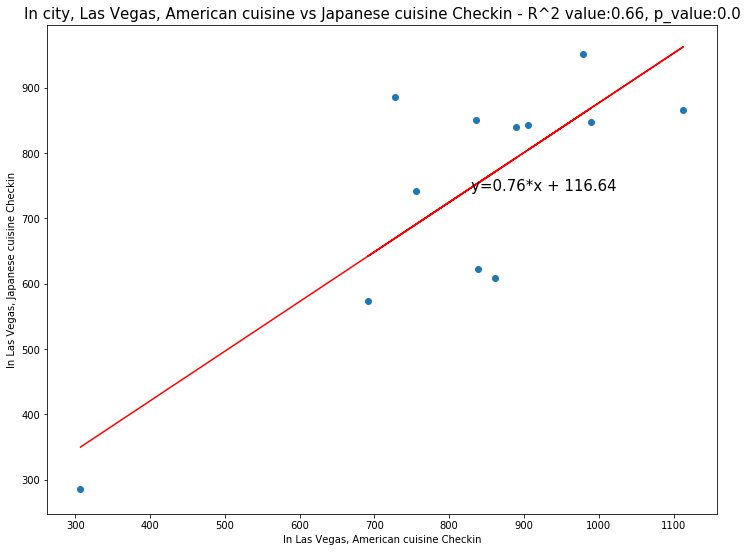

R-square is 0.78
p-value is 0.0


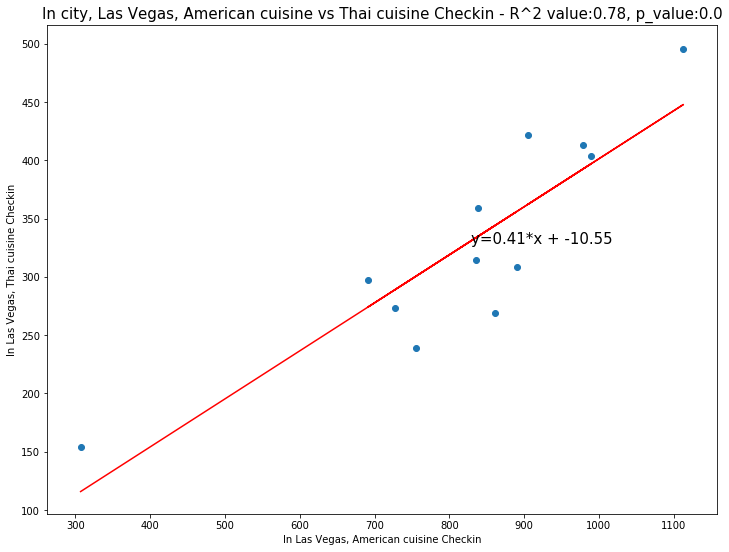

R-square is 0.17
p-value is 0.18


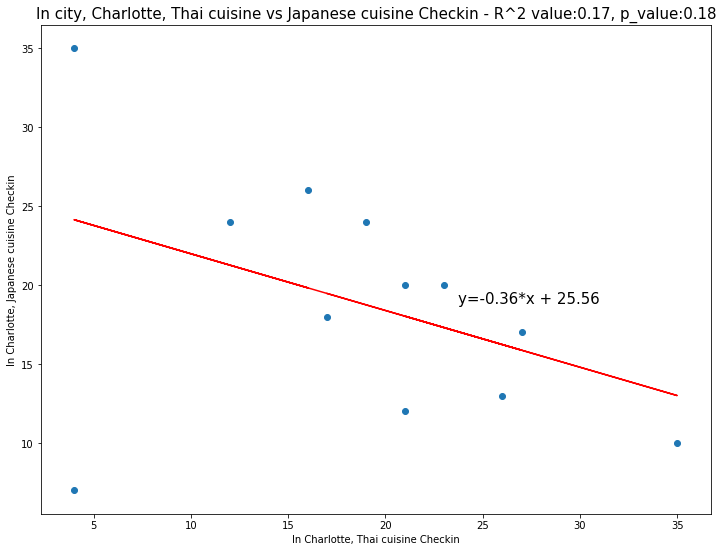

R-square is 0.13
p-value is 0.26


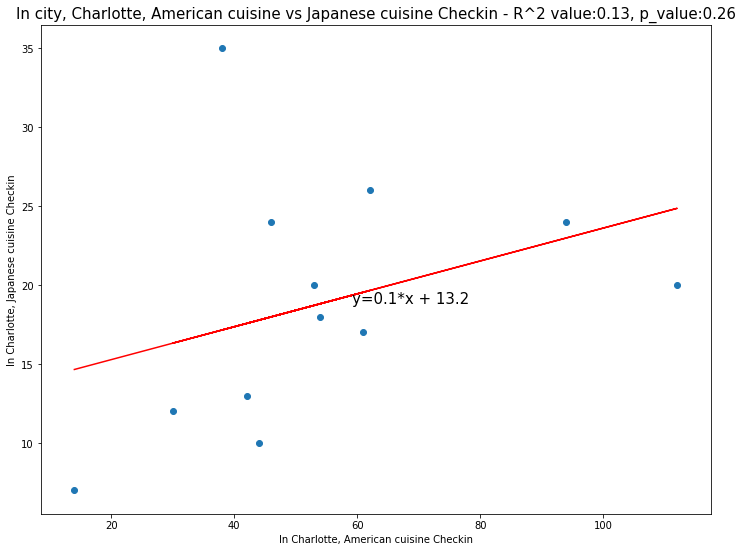

R-square is 0.08
p-value is 0.38


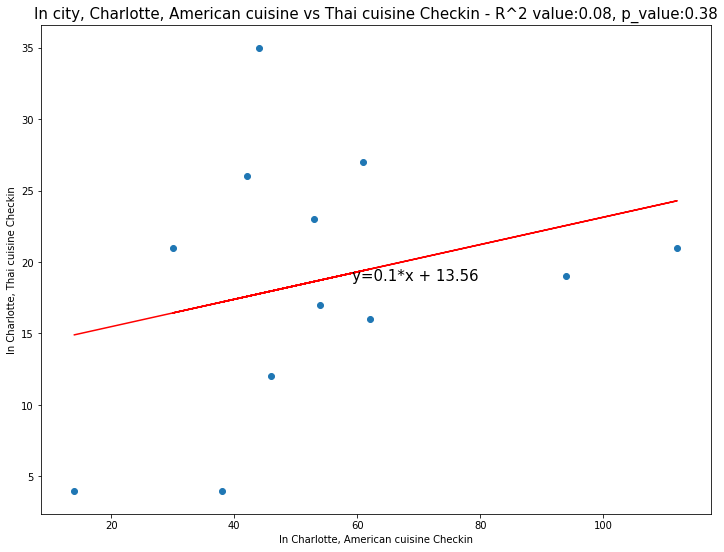

R-square is 0.0
p-value is 0.87


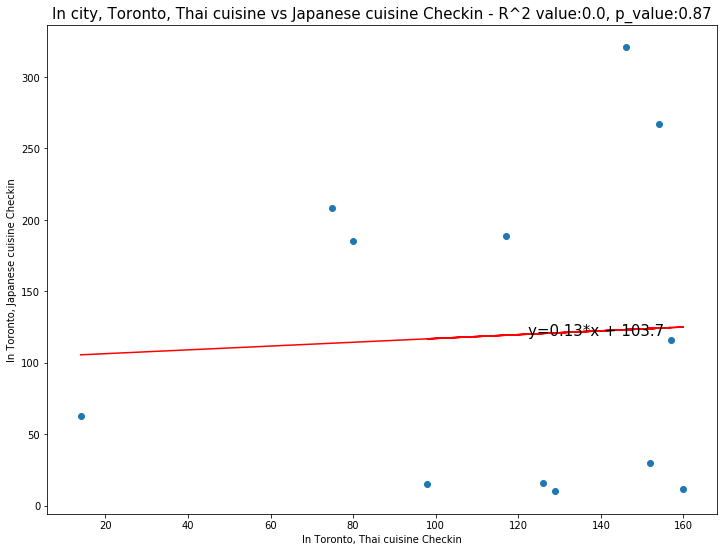

In [9]:
for city in city_list:
    city_cuisine_checkin_list = []
    for cuisine in cuisines:
        city_checkin_list = []
        checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
        for index, row in checkin_per_city.iterrows():
            if cuisine in row["Category"]:
                city_checkin_list.append(cuisine)
                city_checkin_list.append(row["2019-01"])
                city_checkin_list.append(row["2019-02"])
                city_checkin_list.append(row["2019-03"])
                city_checkin_list.append(row["2019-04"])
                city_checkin_list.append(row["2019-05"])
                city_checkin_list.append(row["2019-06"])
                city_checkin_list.append(row["2019-07"])
                city_checkin_list.append(row["2019-08"])
                city_checkin_list.append(row["2019-09"])
                city_checkin_list.append(row["2019-10"])
                city_checkin_list.append(row["2019-11"])
                city_checkin_list.append(row["2019-12"])
        if len(city_checkin_list)>0:
            city_cuisine_checkin_list.append(city_checkin_list)
    for i in range((len(city_cuisine_checkin_list))):
        for j in range(i):
            if i != j:
                x = city_cuisine_checkin_list[i]
                y = city_cuisine_checkin_list[j]
                slope, intercept, r_value, p_value, std_err = st.linregress(x[1:], y[1:])
                y_value = slope*np.asarray(x[1:]) + intercept
                lin_equ = f"y={round(slope,2)}*x + {round(intercept,2)}"
                
                plt.figure(figsize=(12,9))
                plt.plot(x[1:], y_value, "r-")
                plt.annotate(lin_equ, (np.asarray(x[1:]).mean()+5, np.asarray(y[1:]).mean()), size=15)
                print(f"R-square is {round(r_value**2,2)}")
                print(f"p-value is {round(p_value, 2)}")
                
                plt.scatter(x[1:], y[1:])
                plt.ylabel(f"In {city}, {y[0].capitalize()} cuisine Checkin")
                plt.xlabel(f"In {city}, {x[0].capitalize()} cuisine Checkin")
                plt.title(f"In city, {city}, {x[0].capitalize()} cuisine vs {y[0].capitalize()} cuisine Checkin - R^2 value:{round(r_value**2,2)}, p_value:{round(p_value,2)}", size=15)
                plt.savefig(f"./FinalResult/scatter_chart_{city}_{x[0].capitalize()}_{y[0].capitalize()}.png")
                plt.show()
 

# Stacked bar chart for checkin number of cuisines of [japanese, thai and american] versus temperature of each city

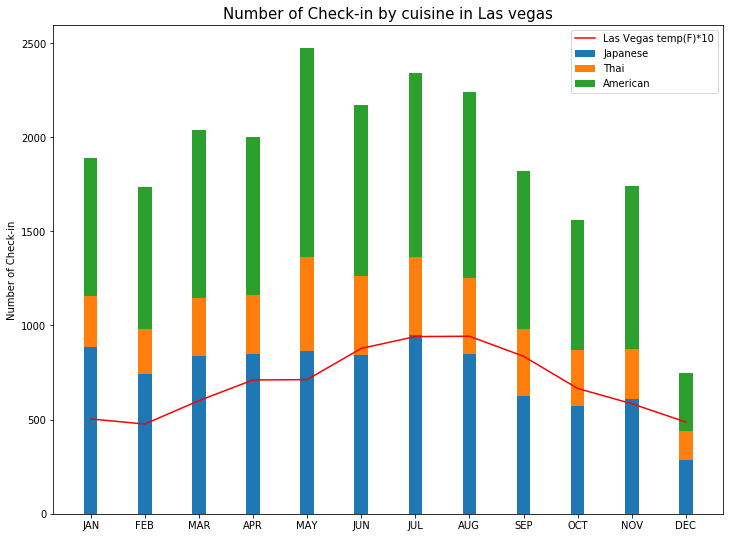

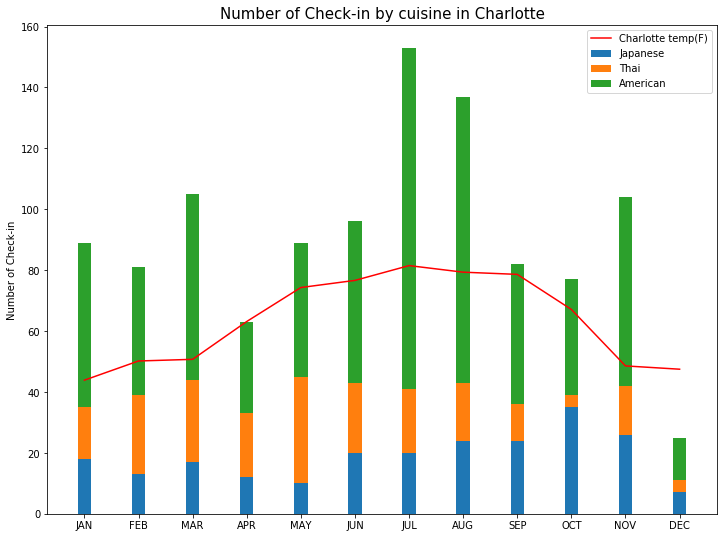

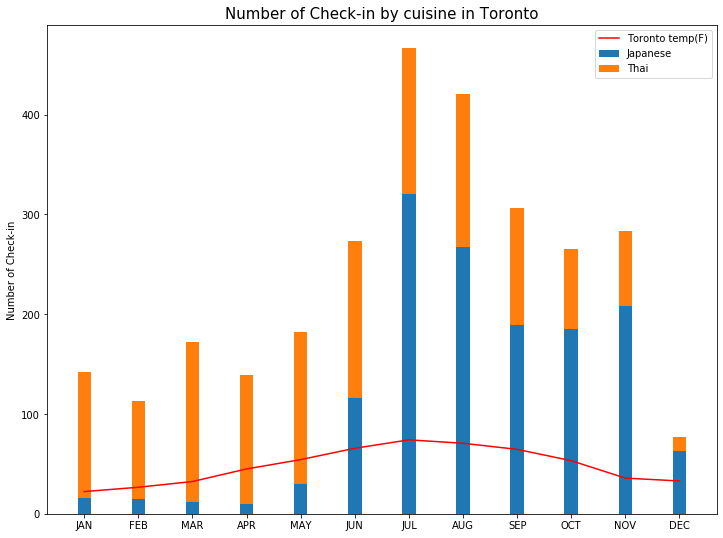

In [10]:
for city in city_list:
    city_cuisine_checkin_list = []
    for cuisine in cuisines:
        city_checkin_list = []
        checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
        for index, row in checkin_per_city.iterrows():
            if cuisine in row["Category"]:
                city_checkin_list.append(cuisine)
                city_checkin_list.append(row["2019-01"])
                city_checkin_list.append(row["2019-02"])
                city_checkin_list.append(row["2019-03"])
                city_checkin_list.append(row["2019-04"])
                city_checkin_list.append(row["2019-05"])
                city_checkin_list.append(row["2019-06"])
                city_checkin_list.append(row["2019-07"])
                city_checkin_list.append(row["2019-08"])
                city_checkin_list.append(row["2019-09"])
                city_checkin_list.append(row["2019-10"])
                city_checkin_list.append(row["2019-11"])
                city_checkin_list.append(row["2019-12"])
        if len(city_checkin_list)>0:
            city_cuisine_checkin_list.append(city_checkin_list)
    city_temperature_list = list(weather_city_df.loc[weather_city_df.City == city, "Average Temperature (F)"])
    months=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
    x_axis = np.arange(1,13)
    num_bar = len(city_cuisine_checkin_list)
    bar_width = 0.25
    
    fig, ax = plt.subplots(figsize=(12,9))

    if num_bar == 3:
        rect1 = ax.bar(x_axis, city_cuisine_checkin_list[0][1:], width = bar_width, label = city_cuisine_checkin_list[0][0].capitalize())
        rect2 = ax.bar(x_axis, city_cuisine_checkin_list[1][1:], bottom = city_cuisine_checkin_list[0][1:], width = bar_width, label = city_cuisine_checkin_list[1][0].capitalize())
        rect3 = ax.bar(x_axis, city_cuisine_checkin_list[2][1:], bottom = np.asarray(city_cuisine_checkin_list[0][1:])+np.asarray(city_cuisine_checkin_list[1][1:]),width = bar_width, label = city_cuisine_checkin_list[2][0].capitalize())
        if city == "Las Vegas":
            rect4 = ax.plot(x_axis, np.asarray(city_temperature_list)*10, "r-", label=f"{city} temp(F)*10")
        else:
            rect4 = ax.plot(x_axis, np.asarray(city_temperature_list), "r-", label=f"{city} temp(F)")            
    elif num_bar == 2:
        rect1 = ax.bar(x_axis, city_cuisine_checkin_list[0][1:], width = bar_width, label = city_cuisine_checkin_list[0][0].capitalize())
        rect2 = ax.bar(x_axis, city_cuisine_checkin_list[1][1:], bottom = city_cuisine_checkin_list[0][1:], width = bar_width, label = city_cuisine_checkin_list[1][0].capitalize())
        rect3 = ax.plot(x_axis, np.asarray(city_temperature_list), "r-", label=f"{city} temp(F)")
    else:
        continue

    ax.set_ylabel("Number of Check-in")
    ax.set_title(f"Number of Check-in by cuisine in {city.capitalize()}", size=15)
    ax.set_xticks(x_axis)
    ax.set_xticklabels(months)
    ax.legend()
    plt.savefig(f"./FinalResult/stacked_bar_chart_{city.capitalize()}_cuisines.png")
    plt.show()

# Scatter charter of japanese restaurant checkin versus temperature of 3 cities

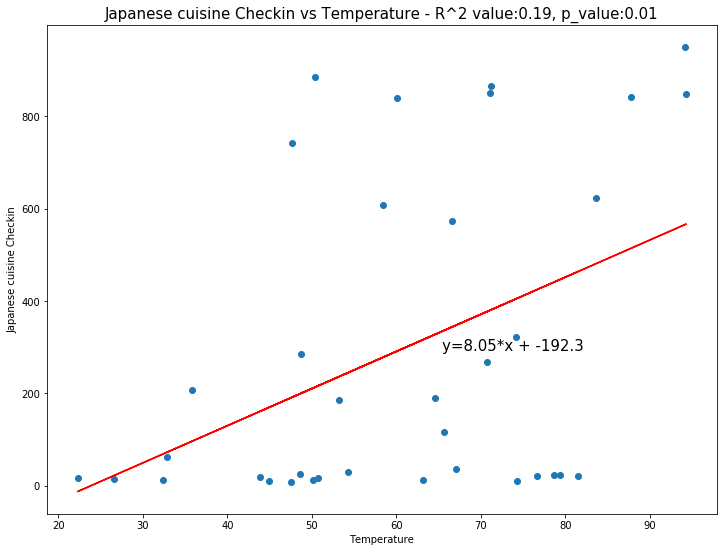

In [11]:
cuisine = "japanese"
total_checkin_list = []
total_weather_list = []
for city in city_list:
    city_checkin_list = []
    checkin_per_city = cuisine_city_df.loc[cuisine_city_df.City == city]
    for index, row in checkin_per_city.iterrows():
        if cuisine in row["Category"]:
            city_checkin_list.append(row["2019-01"])
            city_checkin_list.append(row["2019-02"])
            city_checkin_list.append(row["2019-03"])
            city_checkin_list.append(row["2019-04"])
            city_checkin_list.append(row["2019-05"])
            city_checkin_list.append(row["2019-06"])
            city_checkin_list.append(row["2019-07"])
            city_checkin_list.append(row["2019-08"])
            city_checkin_list.append(row["2019-09"])
            city_checkin_list.append(row["2019-10"])
            city_checkin_list.append(row["2019-11"])
            city_checkin_list.append(row["2019-12"])
    if len(city_checkin_list)>0:
        total_checkin_list = total_checkin_list + city_checkin_list
    city_temperature_list = list(weather_city_df.loc[weather_city_df.City == city, "Average Temperature (F)"])
    total_weather_list = total_weather_list + city_temperature_list

plt.figure(figsize=(12,9))
plt.scatter(total_weather_list, total_checkin_list)
slope, intercept, r_value, p_value, std_err = st.linregress(total_weather_list, total_checkin_list)
y_value = slope*np.asarray(total_weather_list) + intercept
lin_equ = f"y={round(slope,2)}*x + {round(intercept,2)}"
                
plt.plot(total_weather_list, y_value, "r-")
plt.annotate(lin_equ, (np.asarray(total_weather_list).mean()+5, np.asarray(total_checkin_list).mean()), size=15)

plt.ylabel(f"{cuisine.capitalize()} cuisine Checkin")
plt.xlabel(f"Temperature")
plt.title(f"{cuisine.capitalize()} cuisine Checkin vs Temperature - R^2 value:{round(r_value**2,2)}, p_value:{round(p_value,2)}", size=15)
plt.savefig(f"./FinalResult/scatter_chart_temperature_{cuisine}.png")
plt.show()